In [72]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [74]:
tickers = ["NVDA", "NFLX", "TSLA","^GSPC"]
colors = ["green", "red", "blue", "purple" ]
deltas = [-7, -5, -3, 0, 3, 5, 7]
ticker_colors = {ticker: color for ticker, color in zip(tickers, colors)}
period = "5y"
tickers_data = {}

In [75]:
file_paths_text = [
    "/content/drive/MyDrive/IA1/blob_final_data_text/nflx.json",
    "/content/drive/MyDrive/IA1/blob_final_data_text/nvda.json",
    "/content/drive/MyDrive/IA1/blob_final_data_text/tsla.json"
]

file_paths_title = [
    "/content/drive/MyDrive/IA1/blob_final_data_title/nflx.json",
    "/content/drive/MyDrive/IA1/blob_final_data_title/nvda.json",
    "/content/drive/MyDrive/IA1/blob_final_data_title/tsla.json"
]

In [76]:
def read_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON in {file_path}: {e}")
        return None

def read_text_data(file_paths):
    text_data = []
    for file_path in file_paths:
        text_data.append(read_json_file(file_path))
    return text_data

def read_title_data(file_paths):
    title_data = []
    for file_path in file_paths:
        title_data.append(read_json_file(file_path))
    return title_data

text_data = read_text_data(file_paths_text)
title_data = read_title_data(file_paths_title)

In [77]:
flattened_data = []

for entry in title_data:
    for sub_entry in entry:
        flattened_entry = {
            'title': sub_entry.get('title', ''),
            'publish_date': sub_entry.get('publish_date', ''),
            'compound': sub_entry.get('vader_score_raw', {}).get('compound', None),
            'lemmatized': sub_entry.get('vader_score_lemmatized', {}).get('compound', None),
            'steemed': sub_entry.get('vader_score_steemed', {}).get('compound', None),
            'stopwords': sub_entry.get('vader_score_stopwords', {}).get('compound', None),
            'minus_7': sub_entry.get('stock_ratio', {}).get('-7', None),
            'minus_5': sub_entry.get('stock_ratio', {}).get('-5', None),
            'minus_3': sub_entry.get('stock_ratio', {}).get('-3', None),
            'day_0': sub_entry.get('stock_ratio', {}).get('0', None),
            'plus_3': sub_entry.get('stock_ratio', {}).get('3', None),
            'plus_5': sub_entry.get('stock_ratio', {}).get('5', None),
            'plus_7': sub_entry.get('stock_ratio', {}).get('7', None),
        }
        flattened_data.append(flattened_entry)

score_columns = ['compound', 'lemmatized', 'steemed', 'stopwords']
stock_ratio_columns = ['minus_7', 'minus_5', 'minus_3', 'day_0', 'plus_3', 'plus_5', 'plus_7']

df = pd.DataFrame(flattened_data)

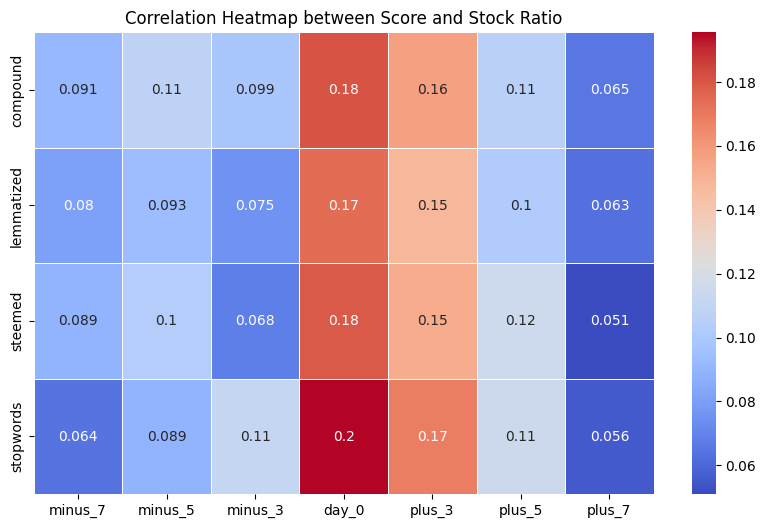

In [78]:
def custom_corr(col1, col2):
    return df[col1].corr(df[col2])

correlation_matrix = []

for score_col in score_columns:
    row = []
    for stock_ratio_col in stock_ratio_columns:
        if score_col != stock_ratio_col:
            corr = custom_corr(score_col, stock_ratio_col)
            row.append(corr)
        else:
            row.append(None)
    correlation_matrix.append(row)

corr_df = pd.DataFrame(correlation_matrix, columns=stock_ratio_columns, index=score_columns)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between Score and Stock Ratio")
plt.show()

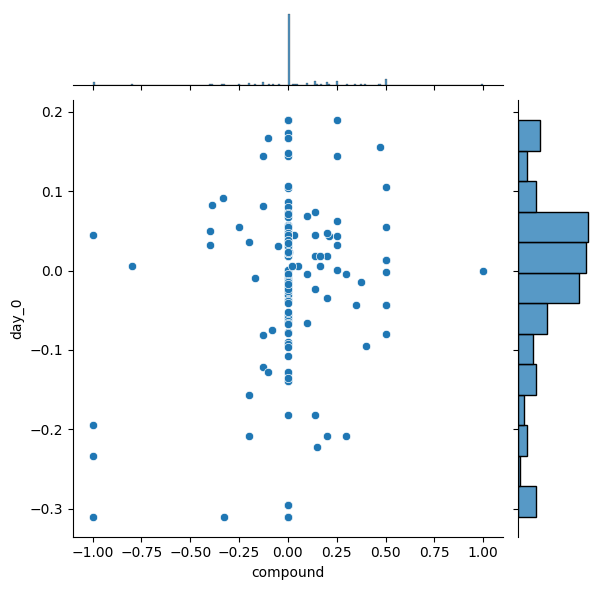

In [79]:
sns.jointplot(x='compound', y='day_0', data=df, kind='scatter')
plt.show()

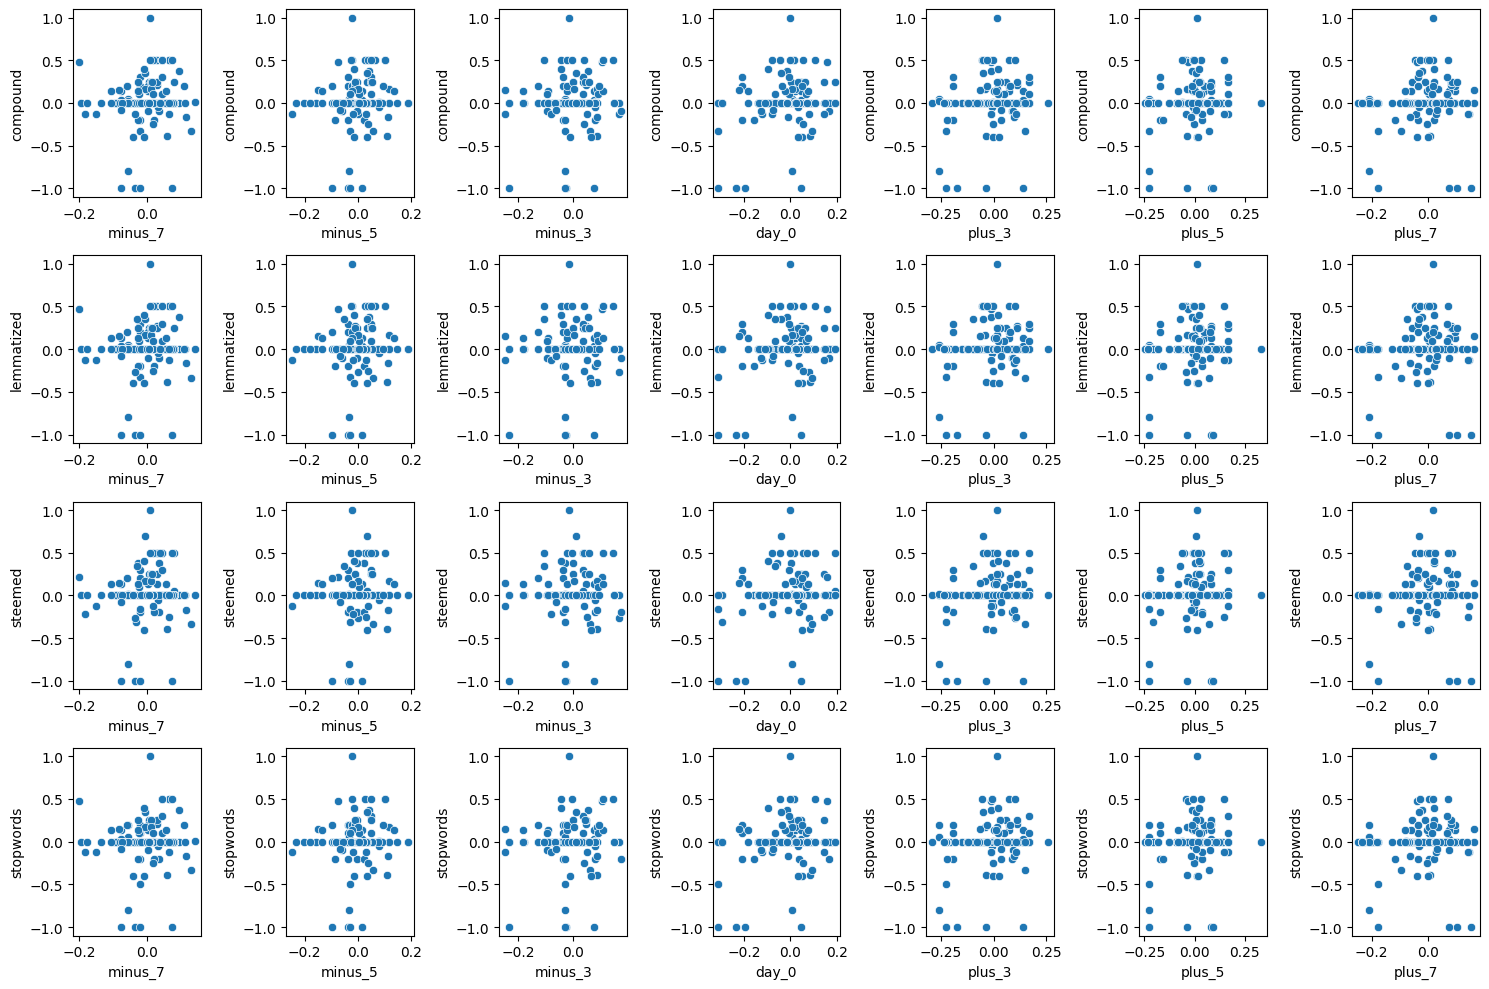

In [80]:
num_rows = len(score_columns)
num_cols = len(stock_ratio_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, score_col in enumerate(score_columns):
    for j, stock_ratio_col in enumerate(stock_ratio_columns):
        sns.scatterplot(x=stock_ratio_col, y=score_col, data=df, ax=axes[i, j])
        axes[i, j].set_xlabel(stock_ratio_col)
        axes[i, j].set_ylabel(score_col)

plt.tight_layout()
plt.show()

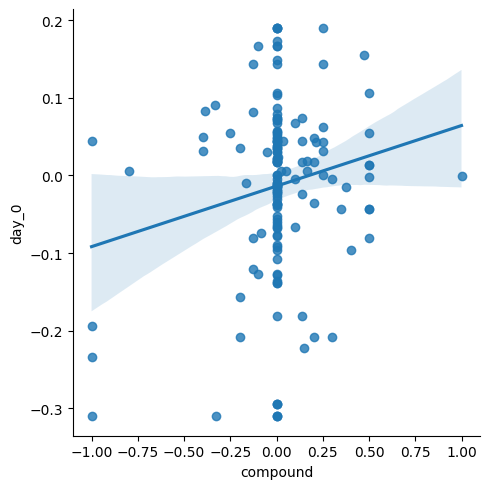

In [81]:
sns.lmplot(x='compound', y='day_0', data=df)
plt.show()


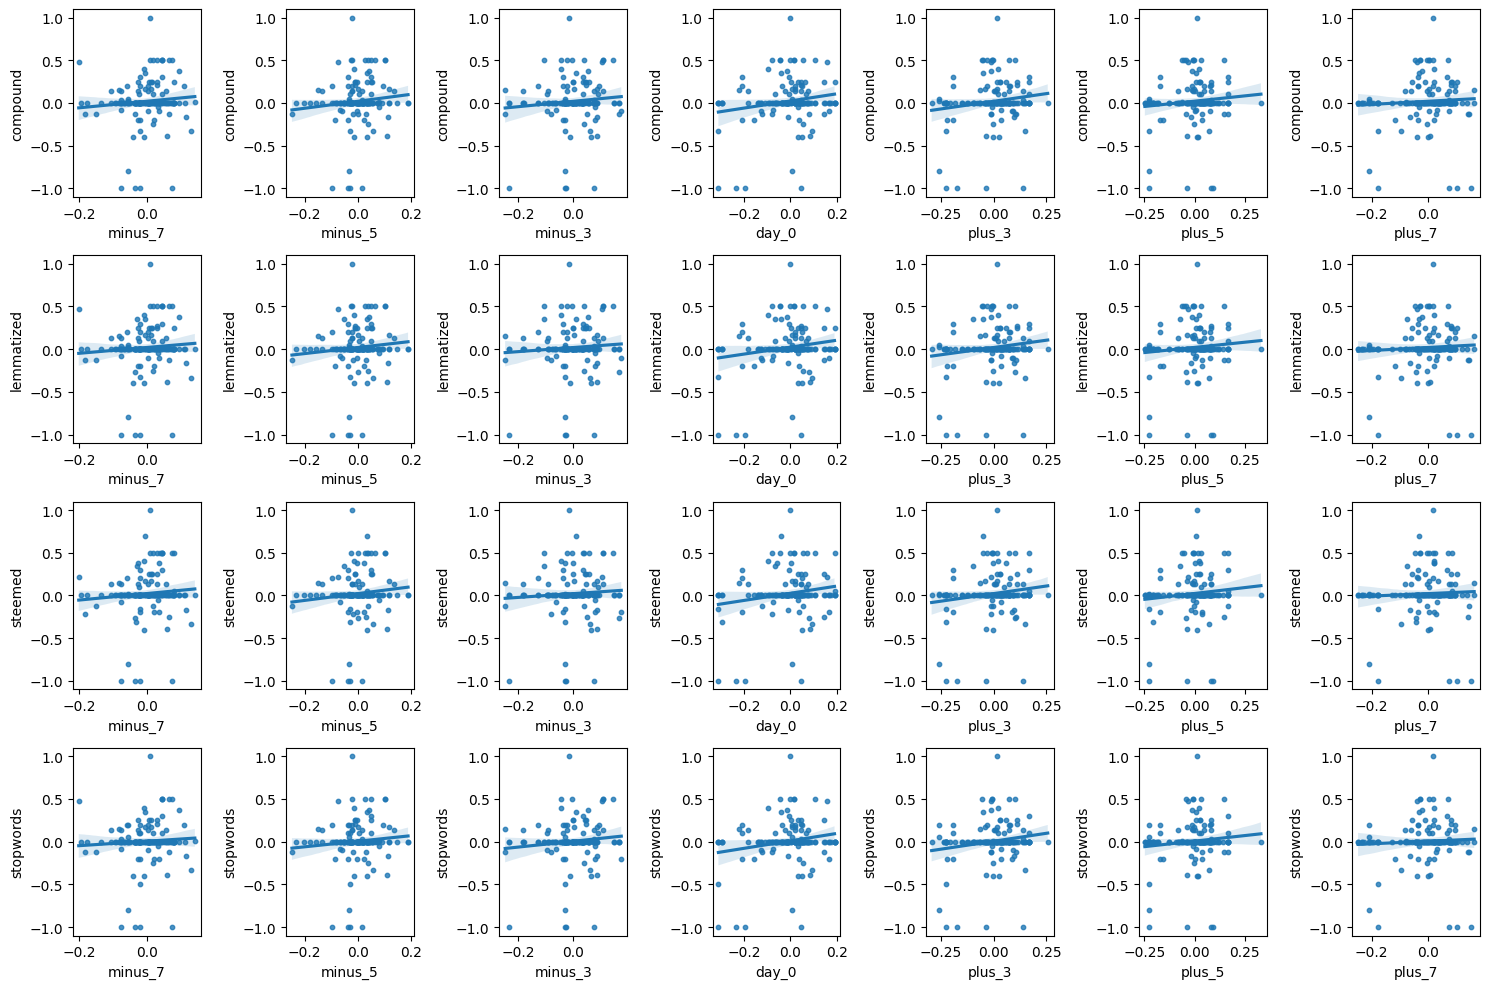

In [82]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, score_col in enumerate(score_columns):
    for j, stock_ratio_col in enumerate(stock_ratio_columns):
        sns.regplot(x=stock_ratio_col, y=score_col, data=df, ax=axes[i, j], scatter_kws={'s': 10})
        axes[i, j].set_xlabel(stock_ratio_col)
        axes[i, j].set_ylabel(score_col)


plt.tight_layout()
plt.show()